In [2]:
import os
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import cv2

from covid.models import dataaug_layer
from covid.utils import get_datasets, get_datagenerators

## Data augmentation

In [2]:
dataset_params = {'batch_size': 32,
                  'class_names': ['COV', 'Normal', 'OtherPneumonia']}

In [43]:
def show_one_img(ds, generator=False):
    plt.figure(figsize=(5,5))
    
    if not generator:
        for images, labels in ds.take(1):
            plt.imshow(np.squeeze(images[0].numpy().astype(np.uint8)), cmap='gray')
            plt.title(str(labels[0].numpy()))
            break
    
    else:
        images, labels = next(ds)
        plt.imshow(np.squeeze(images[0]), cmap='gray')
        plt.title(str(labels[0]))
        
    plt.axis('off');

In [52]:
def show_dataaug(ds, data_augmentation=None, generator=False):
    plt.figure(figsize=(20, 10))
    
    if not generator:
        for images, labels in ds.take(1):
            for i in range(15):
                augmented_images = data_augmentation(images)
                plt.subplot(3, 5, i + 1)
                plt.imshow(augmented_images[0].numpy().astype('uint8'), cmap='gray')
                plt.axis('off')
                
    else:
        images, labels = next(ds)
        for i in range(15):
            plt.subplot(3, 5, i + 1)
            plt.imshow(np.squeeze(images[i]), cmap='gray')
            plt.axis('off')    

### Original images

In [117]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}
train_ds, val_ds = get_datasets('Data/CT-COV19/Train', 'Data/CT-COV19/Val', **img_params, **dataset_params)
data_augmentation = dataaug_layer(0.1, -0.2, 0.1, **img_params)

Found 4404 files belonging to 3 classes.
Found 1341 files belonging to 3 classes.
['COV', 'Normal', 'OtherPneumonia']
['COV', 'Normal', 'OtherPneumonia']


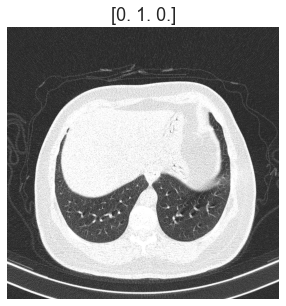

In [44]:
show_one_img(train_ds)

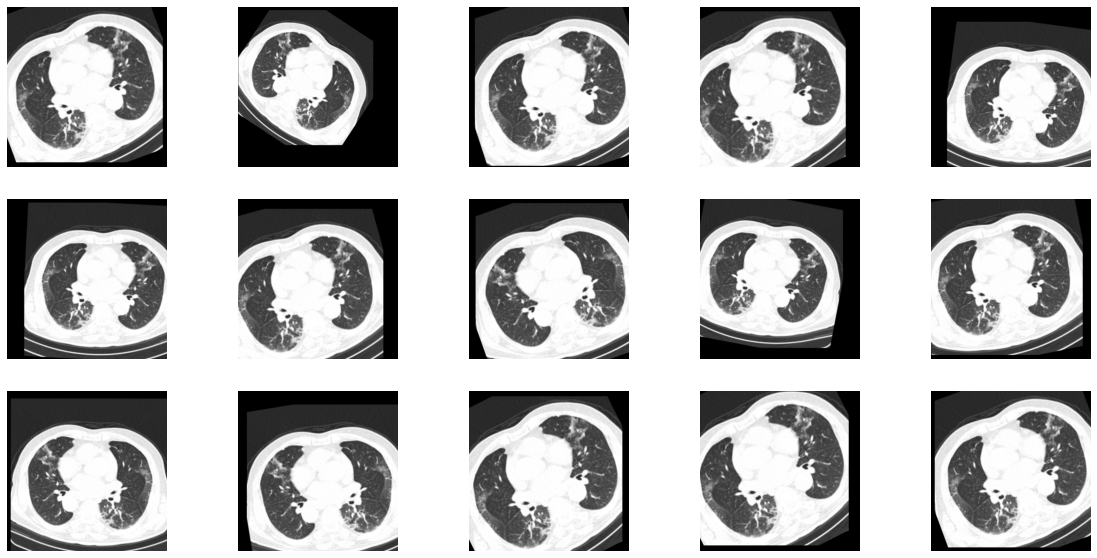

In [53]:
show_dataaug(train_ds, data_augmentation=data_augmentation)

#### Generators

In [46]:
train_generator, val_generator = get_datagenerators('Data/CT-COV19/Train', 'Data/CT-COV19/Val', **img_params, **dataset_params)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


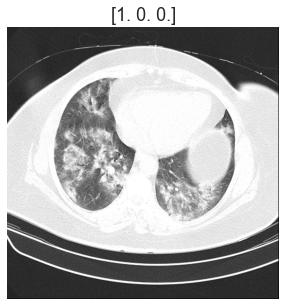

In [47]:
show_one_img(train_generator, generator=True)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


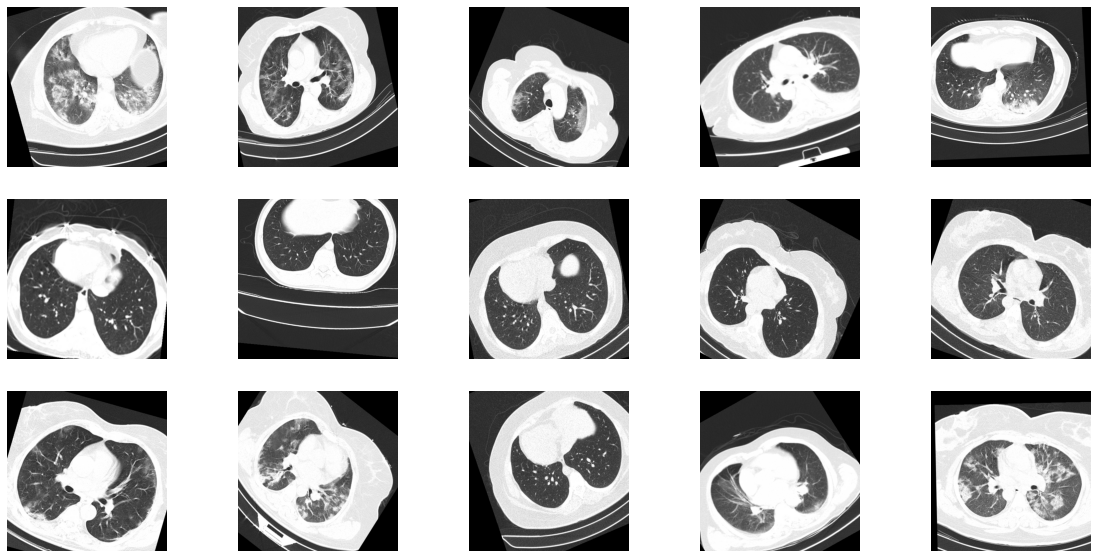

In [118]:
train_generator, val_generator = get_datagenerators('Data/CT-COV19/Train', 'Data/CT-COV19/Val', if_dataaug=True, rotation=36, zoom=[0.8,1], translation=0.1, **img_params, **dataset_params)
show_dataaug(train_generator, generator=True)

### Images with no background

In [115]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}
train_ds, val_ds = get_datasets('Data/CT-COV-Contour/Train', 'Data/CT-COV-Contour/Val', **img_params, **dataset_params)
data_augmentation = dataaug_layer(0.1, -0.2, 0.1, **img_params)

Found 4404 files belonging to 3 classes.
Found 1341 files belonging to 3 classes.
['COV', 'Normal', 'OtherPneumonia']
['COV', 'Normal', 'OtherPneumonia']


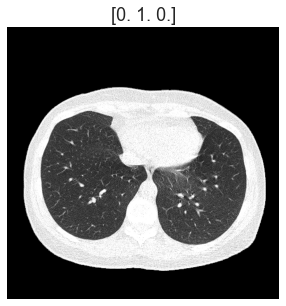

In [57]:
show_one_img(train_ds)

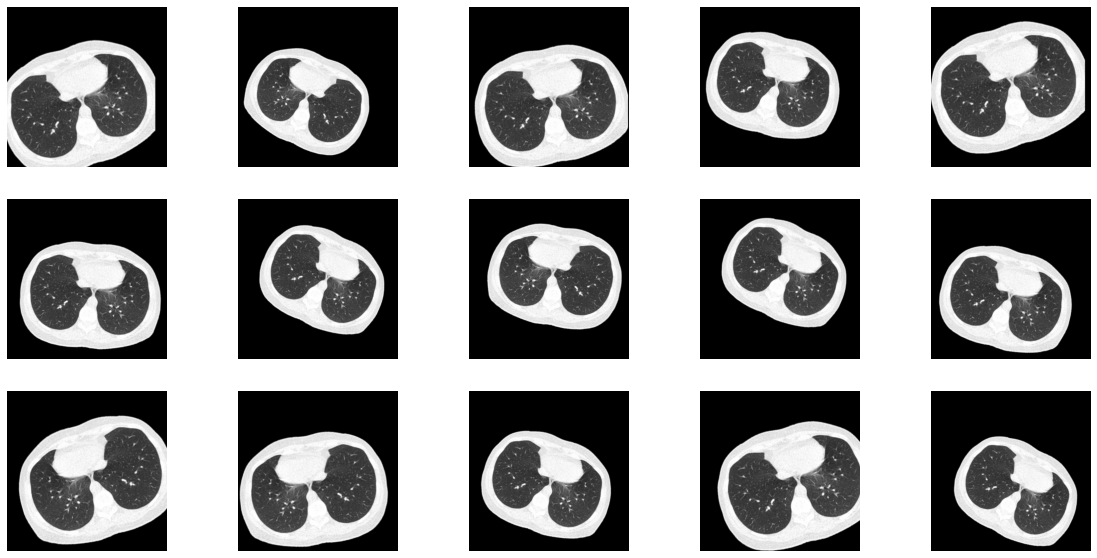

In [65]:
show_dataaug(train_ds, data_augmentation)

#### Generators

In [72]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Contour/Train', 'Data/CT-COV-Contour/Val', **img_params, **dataset_params)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


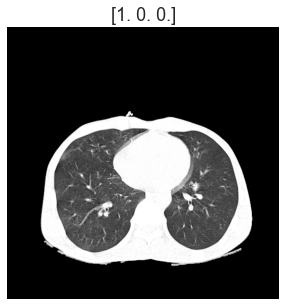

In [73]:
show_one_img(train_generator, generator=True)

In [116]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Contour/Train', 'Data/CT-COV-Contour/Val', if_dataaug=True, rotation=36, zoom=[0.8,1], translation=0.1, **img_params, **dataset_params)
show_dataaug(train_generator, generator=True)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


### Cropped images

In [113]:
img_params = {'img_width': 512,
              'img_height': 328,
              'num_channels': 1}
train_ds, val_ds = get_datasets('Data/CT-COV-Crop/Train', 'Data/CT-COV-Crop/Val', **img_params, **dataset_params)
data_augmentation = dataaug_layer(0.07, -0.1, 0.07, **img_params)

Found 4404 files belonging to 3 classes.
Found 1341 files belonging to 3 classes.
['COV', 'Normal', 'OtherPneumonia']
['COV', 'Normal', 'OtherPneumonia']


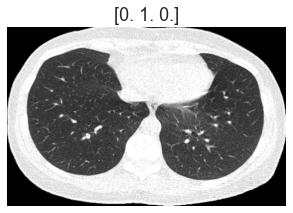

In [55]:
show_one_img(train_ds)

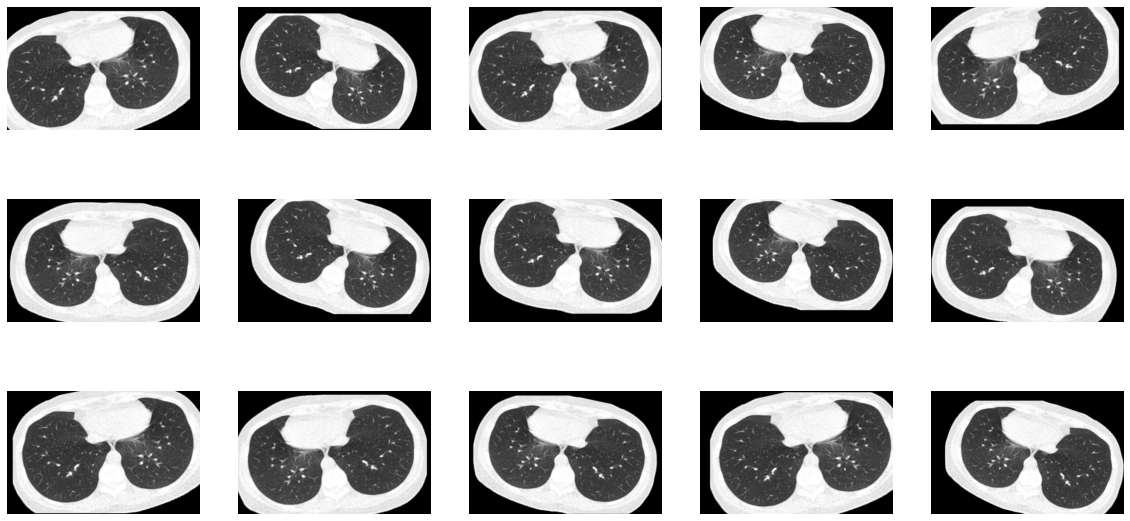

In [67]:
show_dataaug(train_ds, data_augmentation)

#### Generators

In [80]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Crop/Train', 'Data/CT-COV-Crop/Val', **img_params, **dataset_params)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


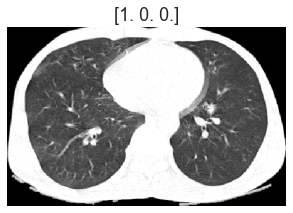

In [81]:
show_one_img(train_generator, generator=True)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


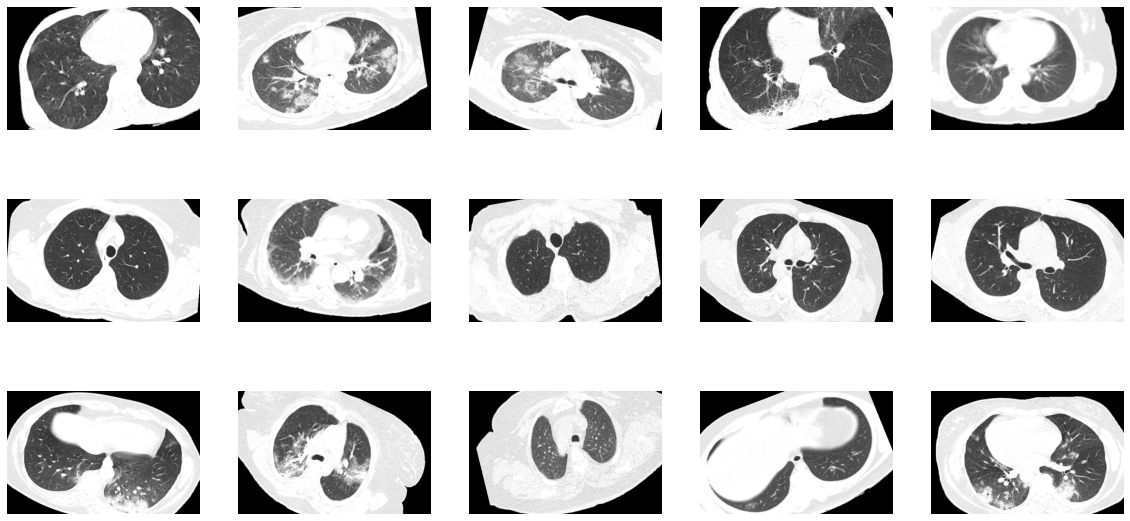

In [114]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Crop/Train', 'Data/CT-COV-Crop/Val', if_dataaug=True, rotation=25, zoom=[0.9,1], translation=0.07, **img_params, **dataset_params)
show_dataaug(train_generator, generator=True)

### Segmented lungs - with no crop

In [110]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}
train_ds, val_ds = get_datasets('Data/CT-COV-Lungs/Train', 'Data/CT-COV-Lungs/Val', **img_params, **dataset_params)
data_augmentation = dataaug_layer(0.1, -0.2, 0.15, **img_params)

Found 4404 files belonging to 3 classes.
Found 1341 files belonging to 3 classes.
['COV', 'Normal', 'OtherPneumonia']
['COV', 'Normal', 'OtherPneumonia']


In [53]:
show_one_img(train_ds)

In [69]:
show_dataaug(train_ds, data_augmentation)

#### Generators

In [111]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Lungs/Train', 'Data/CT-COV-Lungs/Val', **img_params, **dataset_params)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


In [86]:
show_one_img(train_generator, generator=True)

In [112]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Lungs/Train', 'Data/CT-COV-Lungs/Val', if_dataaug=True, rotation=36, zoom=[0.8,1], translation=0.15, **img_params, **dataset_params)
show_dataaug(train_generator, generator=True)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


### Lungs

In [101]:
img_params = {'img_width': 330,
              'img_height': 256,
              'num_channels': 1}
train_ds, val_ds = get_datasets('Data/CT-COV-Lungs-Crop/Train', 'Data/CT-COV-Lungs-Crop/Val', **img_params, **dataset_params)
data_augmentation = dataaug_layer(0.05, -0.1, 0.05, **img_params)

Found 4404 files belonging to 3 classes.
Found 1341 files belonging to 3 classes.
['COV', 'Normal', 'OtherPneumonia']
['COV', 'Normal', 'OtherPneumonia']


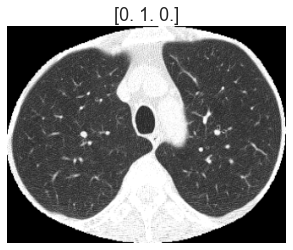

In [51]:
show_one_img(train_ds)

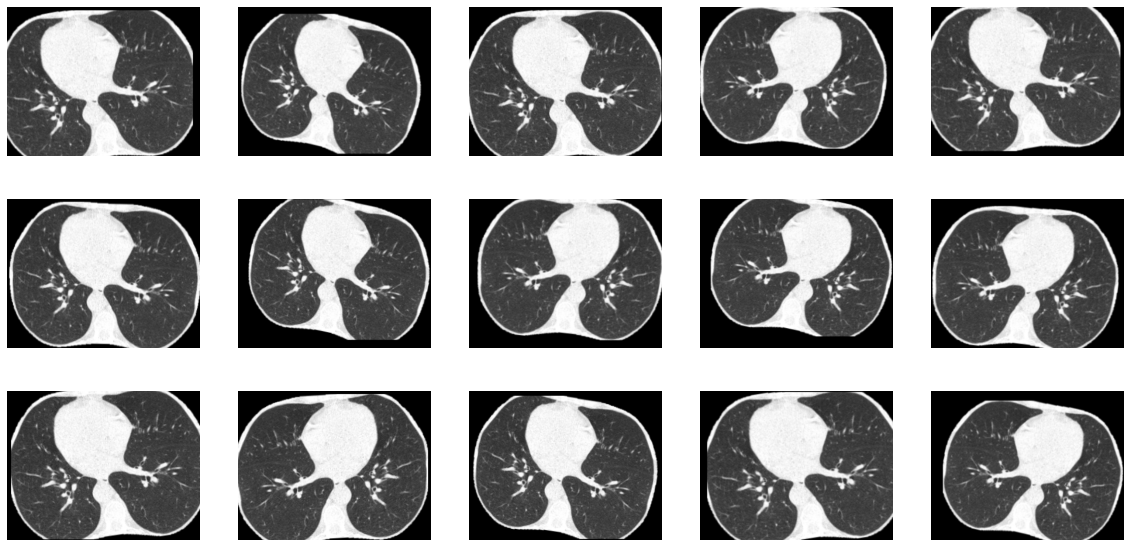

In [71]:
show_dataaug(train_ds, data_augmentation)

#### Generators

In [102]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Lungs-Crop/Train', 'Data/CT-COV-Lungs-Crop/Val', **img_params, **dataset_params)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


In [90]:
show_one_img(train_generator, generator=True)

Found 4404 images belonging to 3 classes.
Found 1341 images belonging to 3 classes.


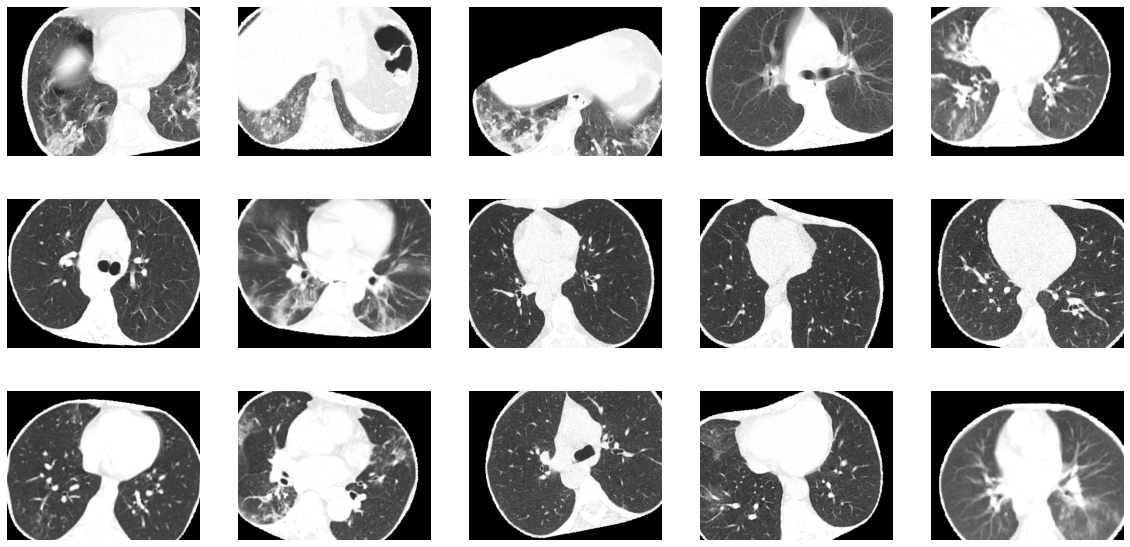

In [109]:
train_generator, val_generator = get_datagenerators('Data/CT-COV-Lungs-Crop/Train', 'Data/CT-COV-Lungs-Crop/Val', if_dataaug=True, rotation=18, zoom=[0.9,1], translation=0.05, **img_params, **dataset_params)
show_dataaug(train_generator, generator=True)